## Hypothesis
To predict the incentive level requested for letting utility companies to raise thermostat setting 
    for 2-3 degrees F when being at home in summer
    
DV: IncAutoS
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ, Latitude, HomeS, EnergyC, 
    MC, ComfNS, HabitC, Trust

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [31]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

#table(survey$HomeS)
survey <- survey[survey$HomeS>60,];
survey <- survey[survey$HomeS<80,];
#table(survey$HomeS)

#table(survey$HomeW)
survey <- survey[survey$HomeW>60,];
survey <- survey[survey$HomeW<80,];
#table(survey$HomeW)

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
#table(survey$Job)
#table(survey$Political)
sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "AwayW"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HomeW"       "HouseholdS"  "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [66] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [71] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [76] "MC4"         "MC5"         "OwnRent"     "PBC1"        "PBC2"       
 [81] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [86] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [91] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [96] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[101] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[106] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

In [32]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "X.9to5" "191"   
[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC1" "191"     
[1] "EnergyC2" "191"     
[1] "EnergyC3" "191"     
[1] "EnergyC4" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "MC3" "191"
[1] "MC4" "191"
[1] "MC5" "191"
[1] "Frugal1" "191"    
[1] "Frugal2" "191"    
[1] "Frugal3" "191"    
[1] "Trust1" "191"   
[1] "Trust2" "191"   
[1] "Trust3" "191"   
[1] "Trust4" "191"   
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ComfNW1" "191"    
[1] "ComfNW2" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3"

In [33]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 732 104
[1] 490 104


In [34]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeS",
"Trust",
"State",
"Summer_avgF")

In [35]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "OwnRent"     "PBC1"        "PBC2"       
 [76] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [81] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [86] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [91] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
 [96] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[101] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Atti"        "ComfNS"      "Educ"        "EnergyC"    
 [6] "Ethnic"      "Frugal"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeS"       "HouseholdS"  "Income"      "Latitude"    "MC"         
[16] "OwnRent"     "PBC"         "Political"   "SN"          "SqftCate"   
[21] "State"       "SubNorm"     "Summer_avgF" "Trust"       "Trust"

In [36]:
data1 <- data2[, which(names(data2) %in% c("IncAutoS",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "ComfNS"      "Educ"        "EnergyC"    
 [6] "Ethnic"      "Gender"      "HabitC"      "HabitG"      "HomeS"      
[11] "HouseholdS"  "IncAutoS"    "Income"      "Latitude"    "MC"         
[16] "OwnRent"     "Political"   "SN"          "SqftCate"    "State"      
[21] "SubNorm"     "Summer_avgF" "Trust"

In [37]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [38]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [39]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"       "IncAutoS"    "State"       "Age"         "Gender"     
 [6] "OwnRent"     "SqftCate"    "HouseholdS"  "Political"   "Ethnic"     
[11] "Income"      "Educ"        "Latitude"    "EnergyC"     "Trust"      
[16] "MC"          "ComfNS"      "Atti"        "SubNorm"     "SN"         
[21] "HabitG"      "HabitC"      "Summer_avgF"

In [40]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [41]:
#convert all data to numeric values

sapply(data2,sd)

HomeS    IncAutoS       State         Age      Gender     OwnRent 
       3.82        1.99       17.04       11.23        0.50        0.51 
   SqftCate  HouseholdS   Political      Ethnic      Income        Educ 
       1.13        1.21        0.85        0.35        1.98        1.12 
   Latitude     EnergyC       Trust          MC      ComfNS        Atti 
       5.09        1.39        1.38        1.08        1.41        1.08 
    SubNorm          SN      HabitG      HabitC Summer_avgF 
       1.34        1.40        1.16        1.38        5.26

In [42]:
hiCor(data2,.7)

,Latitude,Summer_avgF
Latitude,1.00,-0.83
Summer_avgF,-0.83,1.00


In [43]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:21];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:21){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    Gender EnergyC    MC  Atti SubNorm    SN HabitG HabitC
PC1   -0.2   -0.39 -0.32 -0.42   -0.36 -0.22  -0.28  -0.26
[1] 0.24
    HomeS  Age OwnRent SqftCate HouseholdS Income
PC2  0.27 0.33    0.47     0.49       0.25   0.38
[1] 0.32
    State Latitude ComfNS Summer_avgF
PC3  0.21     0.58  -0.21       -0.59
[1] 0.39
    HomeS Gender HouseholdS Educ ComfNS    SN
PC4  0.24  -0.33       -0.5 0.52  -0.26 -0.22
[1] 0.45
    HouseholdS Political Ethnic Income EnergyC ComfNS HabitG HabitC
PC5       0.22      0.45  -0.41   0.25    0.22  -0.23  -0.31  -0.27
[1] 0.5
    IncAutoS   Age HouseholdS Political Trust ComfNS
PC6    -0.54 -0.43       0.27      -0.3  0.26  -0.34
[1] 0.55
    State Ethnic Trust   MC ComfNS    SN HabitG
PC7  0.41  -0.27 -0.45 0.27  -0.41 -0.33   0.33
[1] 0.59
    IncAutoS  Age Gender Ethnic Income SubNorm    SN
PC8    -0.39 0.26    0.5   0.37  -0.22   -0.23 -0.36
[1] 0.64
    HomeS State  Educ EnergyC Trust    MC HabitC
PC9  0.33 -0.47 -0.24   -0.23 -0.26 -0.21

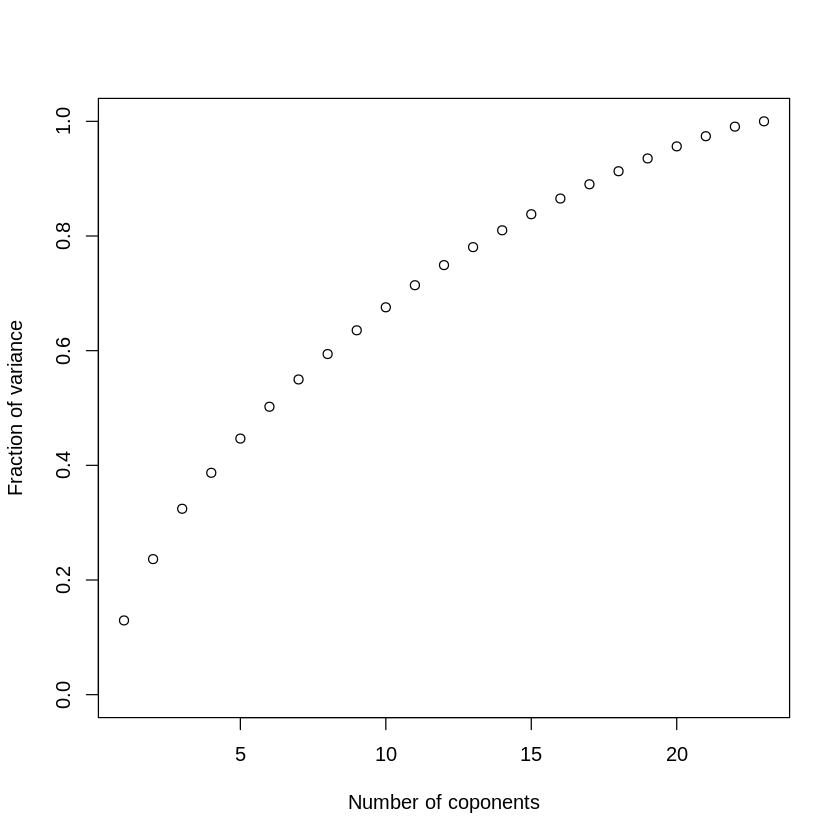

In [44]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [45]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [46]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avgF,23,0.62
Latitude,13,0.61
Atti,18,0.43
SqftCate,7,0.42
EnergyC,14,0.41
OwnRent,6,0.36
Income,11,0.29
SubNorm,19,0.28
HouseholdS,8,0.26
Age,4,0.23
MC,16,0.23


In [47]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeS    IncAutoS       State         Age      Gender     OwnRent 
       0.90        0.94        0.97        1.00        0.91        1.00 
   SqftCate  HouseholdS   Political      Ethnic      Income        Educ 
       0.99        1.00        0.94        0.96        0.99        0.97 
   Latitude     EnergyC       Trust          MC      ComfNS        Atti 
       0.40        0.53        0.97        0.77        0.93        0.45 
    SubNorm          SN      HabitG      HabitC Summer_avgF 
       0.72        0.91        0.85        0.89        0.01 

Loadings:
            Factor1 Factor2
EnergyC      0.67          
Atti         0.71          
SubNorm      0.51          
Latitude            -0.76  
Summer_avgF          0.98  
HomeS                0.31  
IncAutoS                   
State                      
Age                        
Gender                     
OwnRent                    
SqftCate        

In [48]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])
sort(names(data2))

[1] "Age"         "Atti"        "ComfNS"      "Educ"        "EnergyC"    
 [6] "Ethnic"      "Gender"      "HabitC"      "HabitG"      "HomeS"      
[11] "HouseholdS"  "IncAutoS"    "Income"      "Latitude"    "MC"         
[16] "OwnRent"     "Political"   "SN"          "SqftCate"    "State"      
[21] "SubNorm"     "Summer_avgF" "Trust"

In [49]:
#Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ, Latitude, HomeS, EnergyC, 
#    MC, ComfNS, HabitC, Trust, Summer_avgF

In [50]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'HomeS', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'Trust', 'Summer_avgF')

In [51]:
fmla <- as.formula(paste("IncAutoS",paste(IndepPred,collapse="+"),sep="~"));

In [52]:
table(data2[,"IncAutoS"])


  1   2   3   4   5   6   7   8 
 37  53 108 123  47  37  36  49 

In [53]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.148 -1.308 -0.287  1.050  4.984 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.00570    3.11640    2.89   0.0040 ** 
Gender       0.10592    0.17988    0.59   0.5562    
OwnRent     -0.06459    0.19434   -0.33   0.7398    
SqftCate     0.18618    0.09665    1.93   0.0547 .  
HouseholdS  -0.09925    0.07875   -1.26   0.2082    
Political    0.15112    0.10653    1.42   0.1567    
Ethnic      -0.23955    0.24947   -0.96   0.3374    
Income       0.03853    0.04995    0.77   0.4409    
Educ        -0.06055    0.08123   -0.75   0.4564    
Latitude    -0.02672    0.02612   -1.02   0.3069    
HomeS       -0.00708    0.02465   -0.29   0.7740    
EnergyC     -0.29889    0.06712   -4.45  1.1e-05 ***
MC           0.05087    0.08251    0.62   0.5378    
ComfNS       0.39469    0.06241    6.32  5.9e-10 ***
HabitC      -0.03158    0.06529   -0.48   0.6288    
Trust       -

In [54]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Gender,1,1.5e+00,1.5e+00,4.5e-01,5.0e-01
OwnRent,1,1.2e+00,1.2e+00,3.4e-01,5.6e-01
SqftCate,1,2.1e+01,2.1e+01,6.1e+00,1.4e-02
HouseholdS,1,1.8e+00,1.8e+00,5.3e-01,4.7e-01
Political,1,1.2e-03,1.2e-03,3.6e-04,9.8e-01
Ethnic,1,2.8e-02,2.8e-02,8.1e-03,9.3e-01
Income,1,2.4e+00,2.4e+00,6.9e-01,4.1e-01
Educ,1,1.9e+01,1.9e+01,5.5e+00,1.9e-02
Latitude,1,3.2e-03,3.2e-03,9.5e-04,9.8e-01
HomeS,1,4.5e+00,4.5e+00,1.3e+00,2.5e-01


In [55]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.958 -1.192 -0.221  1.176  4.859 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.10424    4.67023    2.81   0.0055 ** 
Gender       0.51248    0.27459    1.87   0.0635 .  
OwnRent     -0.08895    0.27742   -0.32   0.7488    
SqftCate     0.16162    0.14424    1.12   0.2639    
HouseholdS  -0.12990    0.11225   -1.16   0.2486    
Political    0.25801    0.17058    1.51   0.1320    
Ethnic      -0.73698    0.32518   -2.27   0.0245 *  
Income       0.00242    0.07215    0.03   0.9733    
Educ        -0.02049    0.12532   -0.16   0.8703    
Latitude     0.02666    0.04112    0.65   0.5175    
HomeS       -0.03833    0.04002   -0.96   0.3393    
EnergyC     -0.44283    0.10604   -4.18  4.5e-05 ***
MC           0.00753    0.13279    0.06   0.9548    
ComfNS       0.50228    0.09264    5.42  1.7e-07 ***
HabitC      -0.00458    0.10161   -0

In [56]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Gender,1,0.608,0.608,0.1848,6.7e-01
OwnRent,1,0.059,0.059,0.0178,8.9e-01
SqftCate,1,7.661,7.661,2.3306,1.3e-01
HouseholdS,1,1.752,1.752,0.5328,4.7e-01
Political,1,1.429,1.429,0.4346,5.1e-01
Ethnic,1,5.101,5.101,1.5518,2.1e-01
Income,1,0.084,0.084,0.0256,8.7e-01
Educ,1,11.036,11.036,3.3572,6.8e-02
Latitude,1,5.288,5.288,1.6086,2.1e-01
HomeS,1,9.522,9.522,2.8965,9.0e-02


In [57]:
mod = lm(fmla, data=data2,subs=data2$Summer_avgF>70)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    70)

Residuals:
   Min     1Q Median     3Q    Max 
-4.282 -1.258 -0.197  1.114  5.030 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.52776    4.35434    1.73    0.085 .  
Gender       0.26620    0.20033    1.33    0.185    
OwnRent     -0.08853    0.21377   -0.41    0.679    
SqftCate     0.21222    0.10725    1.98    0.049 *  
HouseholdS  -0.22148    0.08796   -2.52    0.012 *  
Political    0.15000    0.12097    1.24    0.216    
Ethnic      -0.44010    0.26070   -1.69    0.092 .  
Income       0.03706    0.05510    0.67    0.502    
Educ        -0.02283    0.09273   -0.25    0.806    
Latitude    -0.03594    0.03241   -1.11    0.268    
HomeS       -0.00297    0.02911   -0.10    0.919    
EnergyC     -0.30963    0.07464   -4.15  4.2e-05 ***
MC           0.10294    0.09195    1.12    0.264    
ComfNS       0.50102    0.07110    7.05  9.0e-12 ***
HabitC      -0.10727    0.07

In [58]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Gender,1,0.88,0.88,0.263,6.1e-01
OwnRent,1,0.29,0.29,0.086,7.7e-01
SqftCate,1,14.54,14.54,4.355,3.8e-02
HouseholdS,1,11.24,11.24,3.366,6.7e-02
Political,1,0.80,0.80,0.241,6.2e-01
Ethnic,1,1.55,1.55,0.465,5.0e-01
Income,1,0.44,0.44,0.131,7.2e-01
Educ,1,13.78,13.78,4.128,4.3e-02
Latitude,1,2.00,2.00,0.600,4.4e-01
HomeS,1,2.87,2.87,0.861,3.5e-01
